In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
from mpl_toolkits.mplot3d import Axes3D

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


<ipython-input-3-6045f2cc7c48>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  ax1b = sns.pointplot(x="size", y="tip", data=tips, dodge=True, ci = 90, color = 'navy')
<ipython-input-3-6045f2cc7c48>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  ax2b = sns.pointplot(x="day", y="tip", data=tips, dodge=True, ci = 90, color = 'navy')
<ipython-input-3-6045f2cc7c48>:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  ax3b = sns.pointplot(x="time", y="tip", data=tips, dodge=True, ci = 90, color = 'navy')
<ipython-input-3-6045f2cc7c48>:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  ax4b = sns.pointplot(x="smoker", y="tip", data=tips, dodge=True, ci = 90, color = 'navy')


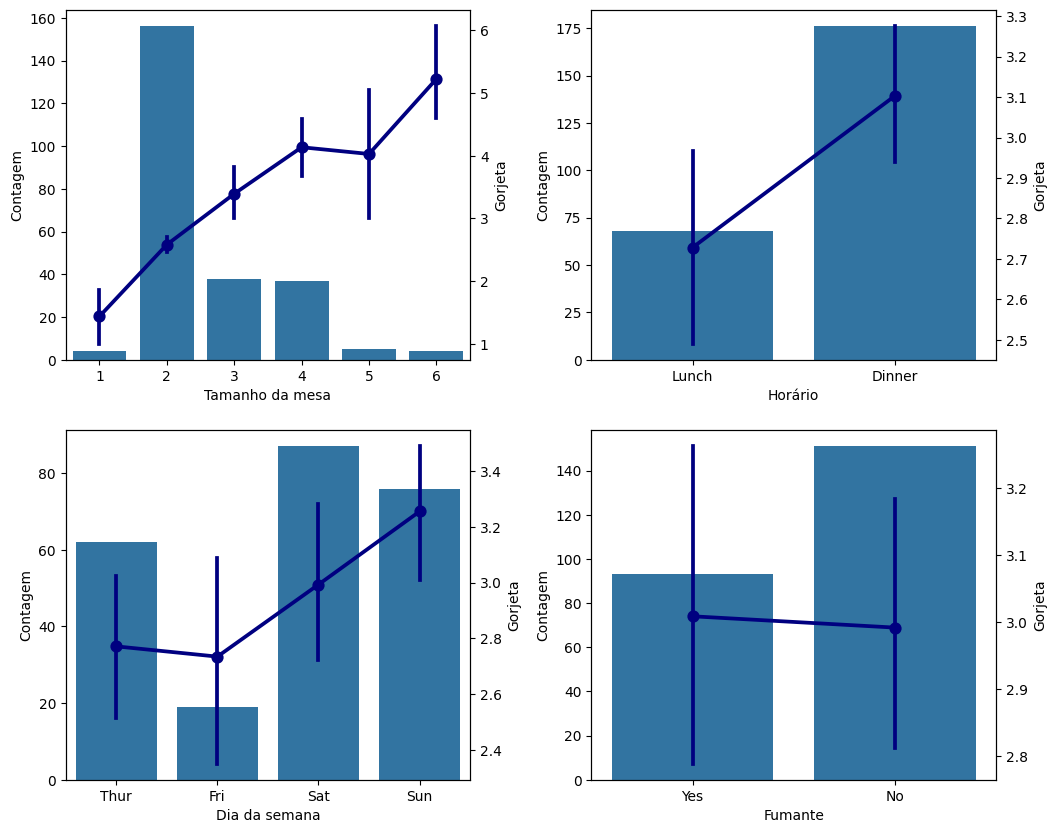

In [3]:
plt.rc('figure', figsize=(12, 10))

fig, axes = plt.subplots(2, 2)

# Gráfico 1: tamanho da mesa
ax1 = axes[0,0]
sns.countplot(x="size", data=tips, dodge=True, ax = ax1)
ax1.set_ylabel("Contagem")
ax1.set_xlabel("Tamanho da mesa")

ax1b = ax1.twinx()
ax1b = sns.pointplot(x="size", y="tip", data=tips, dodge=True, ci = 90, color = 'navy')
plt.ylabel("Gorjeta")

# Gráfico 2: dia da semana
ax2 = axes[1,0]
sns.countplot(x="day", data=tips, dodge=True, ax = ax2)
ax2.set_ylabel("Contagem")
ax2.set_xlabel("Dia da semana")

ax2b = ax2.twinx()
ax2b = sns.pointplot(x="day", y="tip", data=tips, dodge=True, ci = 90, color = 'navy')
plt.ylabel("Gorjeta")

# Gráfico 3: horário
ax3 = axes[0,1]
sns.countplot(x="time", data=tips, dodge=True, ax = ax3)
ax3.set_ylabel("Contagem")
ax3.set_xlabel("Horário")

ax3b = ax3.twinx()
ax3b = sns.pointplot(x="time", y="tip", data=tips, dodge=True, ci = 90, color = 'navy')
plt.ylabel("Gorjeta")

# Gráfico 4: fumante
ax4 = axes[1,1]
sns.countplot(x="smoker", data=tips, dodge=True, ax = ax4)
ax4.set_ylabel("Contagem")
ax4.set_xlabel("Fumante")

ax4b = ax4.twinx()
ax4b = sns.pointplot(x="smoker", y="tip", data=tips, dodge=True, ci = 90, color = 'navy')
plt.ylabel("Gorjeta")

plt.subplots_adjust(wspace=.3, hspace=0.2)

<ipython-input-4-53f57e9f9cff>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  ax2 = sns.pointplot(x="size", y="tip", data=tips, dodge=True, ci = 90)


Text(0, 0.5, 'Resposta')

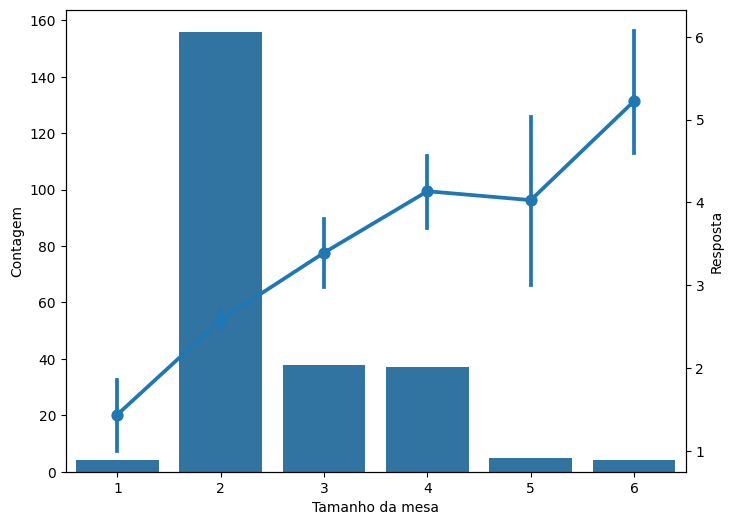

In [4]:
plt.rc('figure', figsize=(8, 6))


ax = sns.countplot(x="size",
                   data=tips, dodge=True)
plt.ylabel("Contagem")
plt.xlabel("Tamanho da mesa")

ax2 = ax.twinx()
ax2 = sns.pointplot(x="size", y="tip", data=tips, dodge=True, ci = 90)
plt.ylabel("Resposta")


In [5]:
quebra = 2

EQM = []
for quebra in range(tips['size'].max() + 1):
    grupos = pd.cut(tips['size']
                    , bins = [-1, quebra, 99]
                    , labels = ['0 a ' + str(quebra), str(quebra) + ' ou mais'])

    tips_ = tips.copy()
    tips_['grupo'] = grupos

    tips_ = tips_.merge(tips_[['tip', 'grupo']].groupby('grupo').mean()
                        , on = 'grupo'
                        , how = 'left')

    # tips_
    tips_['EQ'] = (tips_['tip_x'] - tips_['tip_y'])**2
    EQM.append(tips_['EQ'].mean())


["{:5.2f}".format(x) for x in EQM]

<ipython-input-5-35fa723e42aa>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_ = tips_.merge(tips_[['tip', 'grupo']].groupby('grupo').mean()
<ipython-input-5-35fa723e42aa>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_ = tips_.merge(tips_[['tip', 'grupo']].groupby('grupo').mean()
<ipython-input-5-35fa723e42aa>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_ = tips_.merge(tips_[['tip', 'grupo']].g

[' 1.91', ' 1.87', ' 1.53', ' 1.56', ' 1.81', ' 1.82', ' 1.91']

**Vemos abaixo que o menor EQM está na quebra size > 2.**

Text(0.5, 0, 'Tamanho da mesa < X')

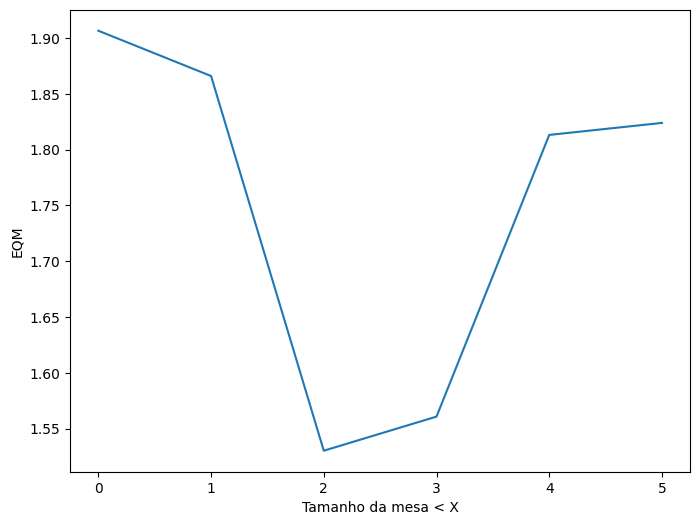

In [6]:
fig = plt.figure()

plt.plot(EQM[0:6])
plt.ylabel("EQM")
plt.xlabel("Tamanho da mesa < X")

**Construindo a árvore1**

In [7]:
X = tips.drop(columns = ['total_bill', 'tip', 'tip_pct']).copy()

X = pd.get_dummies(X, drop_first = True)
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   size         244 non-null    int64
 1   sex_Female   244 non-null    bool 
 2   smoker_No    244 non-null    bool 
 3   day_Fri      244 non-null    bool 
 4   day_Sat      244 non-null    bool 
 5   day_Sun      244 non-null    bool 
 6   time_Dinner  244 non-null    bool 
dtypes: bool(6), int64(1)
memory usage: 3.5 KB
None


,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,2,True,True,False,False,True,True
1,3,False,True,False,False,True,True
2,3,False,True,False,False,True,True
3,2,False,True,False,False,True,True
4,4,True,True,False,False,True,True


In [8]:
y =  tips.loc[:,'tip']

y.head()

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

In [10]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [11]:
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore com profundidade=2 é: 0,23
O MSE da árvore com profundidade=7 é: 0,39


**Visualizando a árvore**

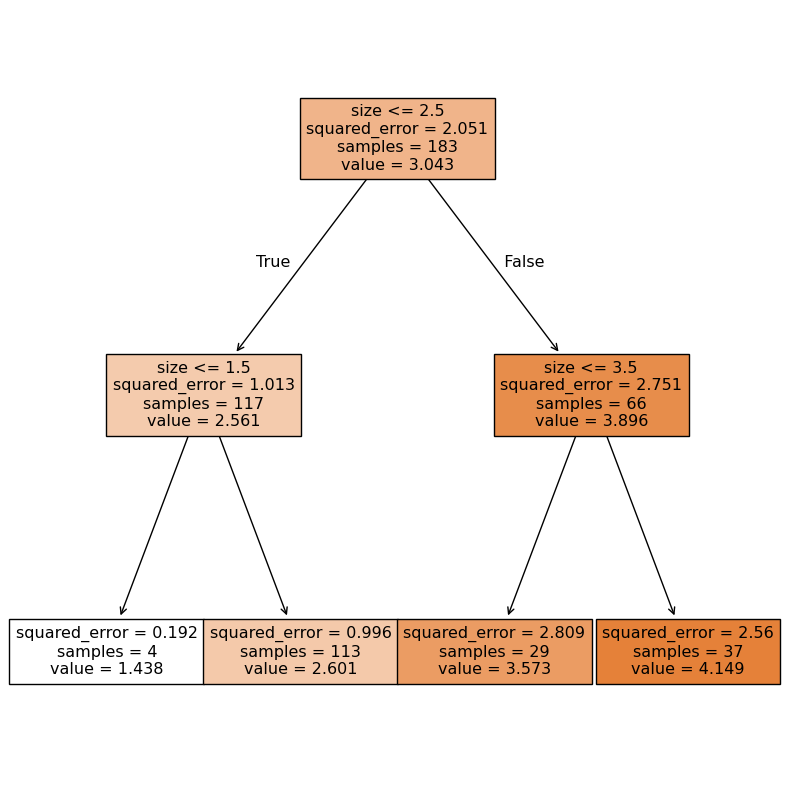

In [12]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_1,
                    feature_names=X.columns,
                    filled=True)

In [13]:
representacao_textual = tree.export_text(regr_1)
print(representacao_textual)

|--- feature_0 <= 2.50
|   |--- feature_0 <= 1.50
|   |   |--- value: [1.44]
|   |--- feature_0 >  1.50
|   |   |--- value: [2.60]
|--- feature_0 >  2.50
|   |--- feature_0 <= 3.50
|   |   |--- value: [3.57]
|   |--- feature_0 >  3.50
|   |   |--- value: [4.15]



**Pré Poda**

In [14]:
regr_1 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)

regr_1.fit(X_train, y_train)

mse1 = regr_1.score(X_test, y_test)
mse1

0.2392376384366276

n_minimo,2,3,4,5,6,7,8,9
profundidade,,,,,,,,
2,0.253436,0.253436,0.253436,0.259370,0.259370,0.259370,0.259370,0.259370
3,0.248468,0.248468,0.248468,0.239238,0.239238,0.239238,0.239238,0.239238
4,0.245427,0.251741,0.251741,0.253258,0.240488,0.241253,0.241253,0.241253
5,0.286381,0.303885,0.303885,0.216256,0.203486,0.229503,0.236062,0.229503
6,0.256097,0.286307,0.286307,0.199597,0.186827,0.212844,0.221031,0.227590
7,0.219033,0.257254,0.272560,0.192430,0.186827,0.205677,0.221031,0.221031
8,0.226581,0.257254,0.264299,0.199597,0.179660,0.212844,0.221031,0.221031


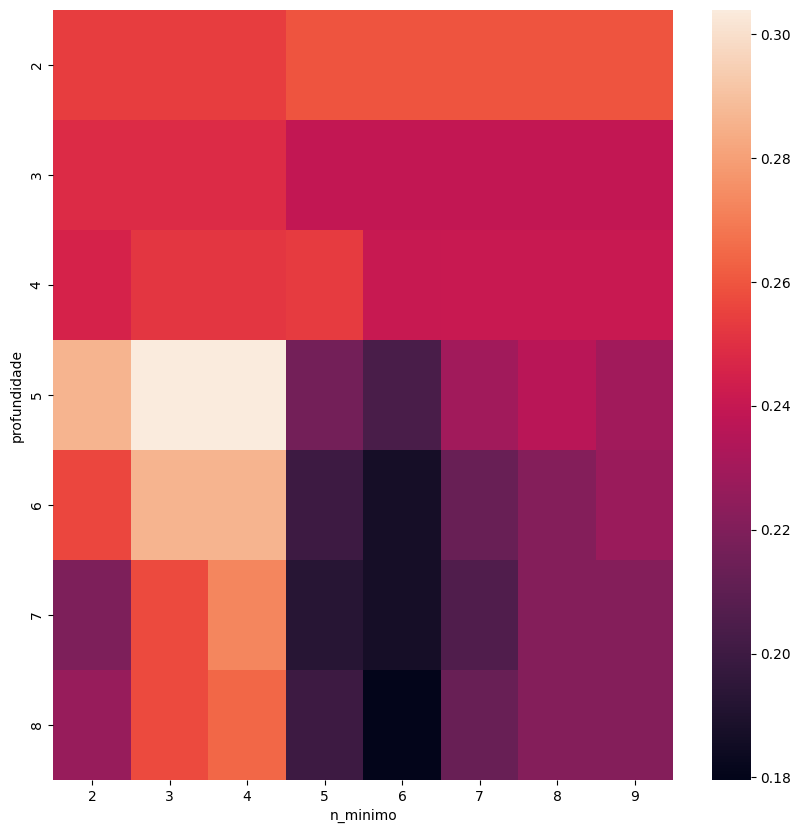

In [15]:
mses = []
ind_i = []
ind_j = []

for i in range(2, 9):
    for j in range(2, 10):
        regr_1 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_1.fit(X_train, y_train)
        mse1 = regr_1.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)

df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo':ind_j})
sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

**intuitivo de pós-poda**

In [16]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [17]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [18]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

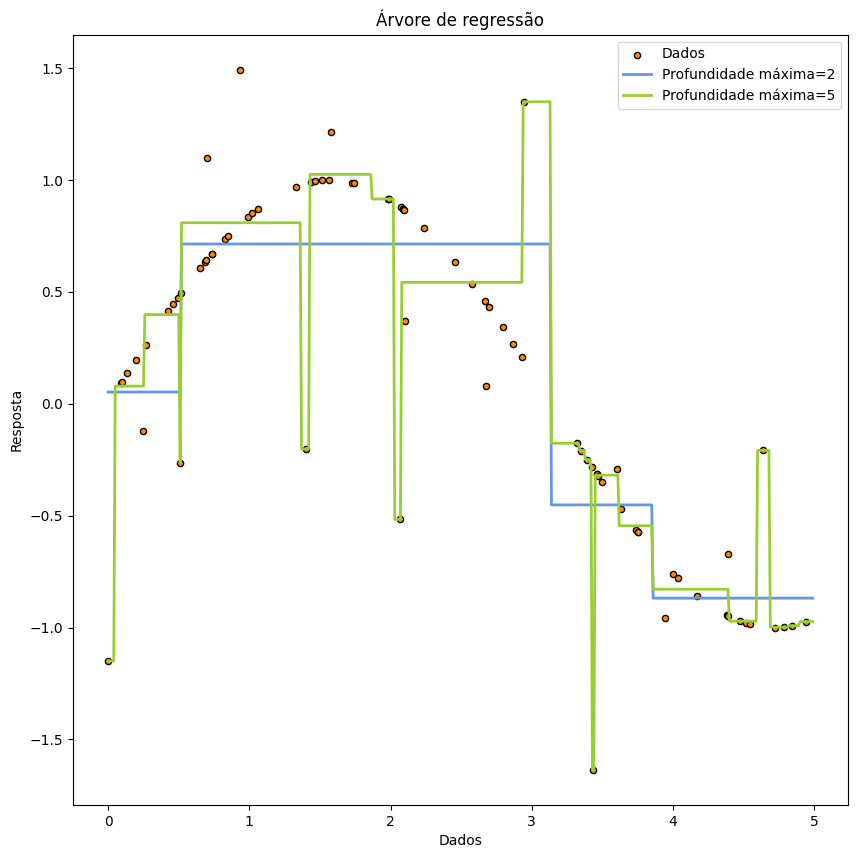

In [19]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="Dados")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="Profundidade máxima=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="Profundidade máxima=5", linewidth=2)
plt.xlabel("Dados")
plt.ylabel("Resposta")
plt.title("Árvore de regressão")
plt.legend()
plt.show()

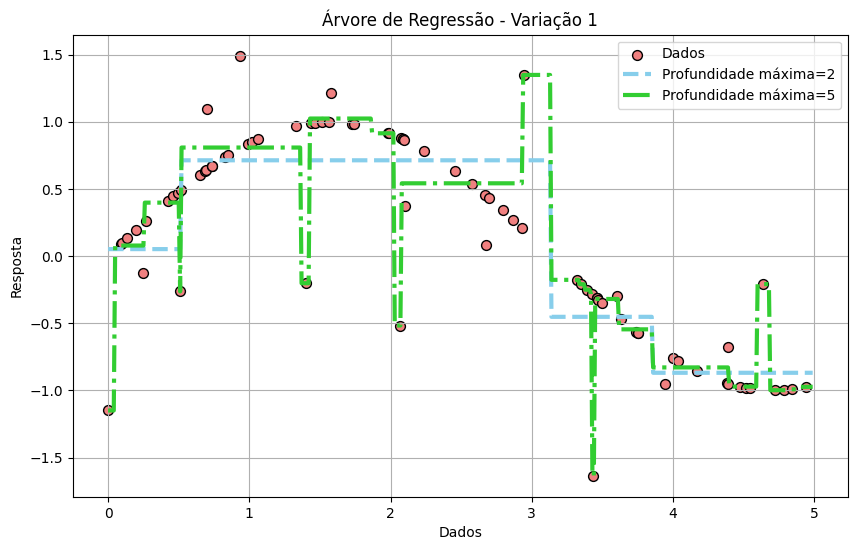

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=50, edgecolor="black", c="lightcoral", label="Dados")  # Alterando cor e tamanho
plt.plot(X_test, y_1, color="skyblue", label="Profundidade máxima=2", linewidth=3, linestyle='--')  # Mudando estilo da linha
plt.plot(X_test, y_2, color="limegreen", label="Profundidade máxima=5", linewidth=3, linestyle='-.')  # Mudando estilo da linha
plt.xlabel("Dados")
plt.ylabel("Resposta")
plt.title("Árvore de Regressão - Variação 1")
plt.legend()
plt.grid(True)  # Adicionando grade
plt.show()

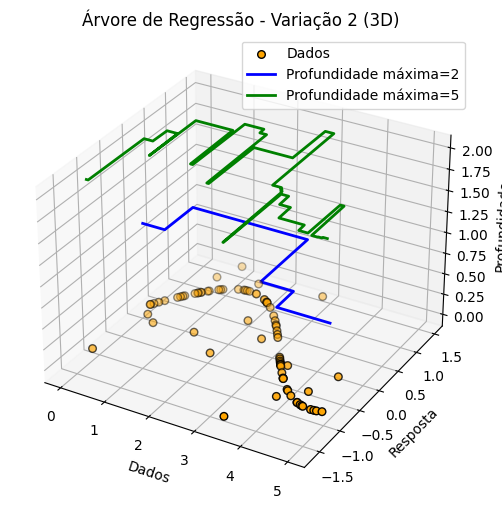

In [22]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, y, s=30, edgecolor="black", c="orange", label="Dados")  # Gráfico 3D

# Mudando a profundidade para ter um efeito visual diferente
ax.plot(X_test, y_1, zs=1, color="blue", label="Profundidade máxima=2", linewidth=2)
ax.plot(X_test, y_2, zs=2, color="green", label="Profundidade máxima=5", linewidth=2)

ax.set_xlabel("Dados")
ax.set_ylabel("Resposta")
ax.set_zlabel("Profundidade")
ax.set_title("Árvore de Regressão - Variação 2 (3D)")
ax.legend()
plt.show()

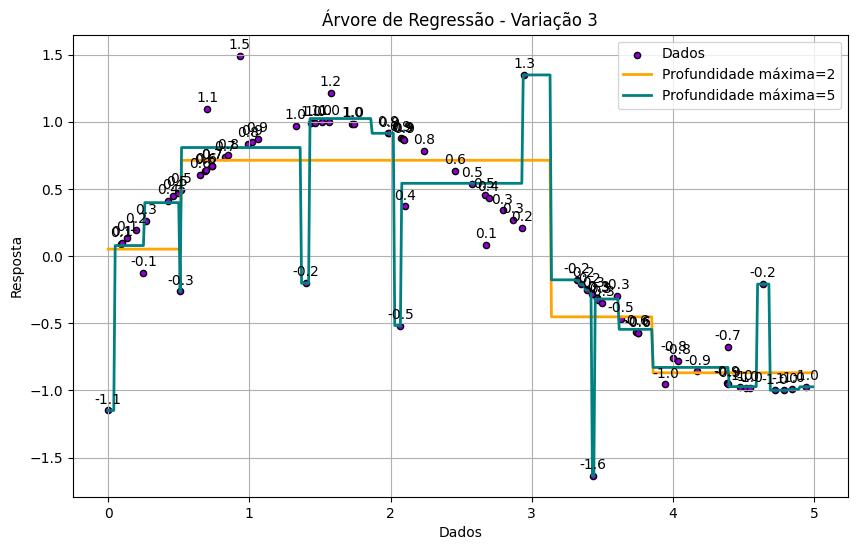

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkviolet", label="Dados")  # Alterando a cor
plt.plot(X_test, y_1, color="orange", label="Profundidade máxima=2", linewidth=2)
plt.plot(X_test, y_2, color="teal", label="Profundidade máxima=5", linewidth=2)

plt.xlabel("Dados")
plt.ylabel("Resposta")
plt.title("Árvore de Regressão - Variação 3")
plt.legend()

# Adicionando anotações para os pontos
for i in range(len(X)):
    plt.annotate(f'{y[i]:.1f}', (X[i], y[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.grid(True)  # Adicionando grade
plt.show()